<a href="https://colab.research.google.com/github/Harsha7021/IMDB-Reviews-/blob/main/AppliedNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Classification**





In this project, I will be investigating NLP methods for distinguishing positive and negative reviews written about movies.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

Training and testing samples to be stored in `training_data` and `testing_data`

In [ ]:
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['getting', 'it', 'right', 'is', 'a', 'far', 'far', ...], 'pos')


Generating a list of 10 content words which are representative of the positive reviews in your training data.

Generating a list of 10 content words which are representative of the negative reviews in your training data.


In [ ]:
training_data[-1]


(['it', 'happens', 'every', 'year', '--', 'the', 'days', ...], 'neg')

In [ ]:
stop_words = stopwords.words("english")
def normalise(wordlist):
  lower=[word.lower() for word in wordlist]
  filter=[word for word in lower if word.isalpha() and word not in stop_words]
  return filter


norm_train_data = [(FreqDist(normalise(wordlist)),label) for (wordlist,label) in training_data]
norm_test_data=[(FreqDist(normalise(wordlist)),label) for (wordlist,label) in testing_data]

In [ ]:
norm_train_data[0:6]

[(FreqDist({'gavin': 17, 'right': 11, 'getting': 8, 'film': 5, 'year': 5, 'old': 5, 'life': 5, 'movie': 4, 'kleiser': 3, 'redgrave': 3, ...}),
  'pos'),
 (FreqDist({'marie': 14, 'jean': 14, 'vincent': 4, 'rampling': 3, 'day': 3, 'returns': 3, 'sand': 3, 'one': 3, 'character': 3, 'loss': 3, ...}),
  'pos'),
 (FreqDist({'film': 10, 'benigni': 8, 'great': 7, 'guido': 7, 'one': 6, 'people': 4, 'best': 4, 'perhaps': 4, 'society': 3, 'must': 3, ...}),
  'pos'),
 (FreqDist({'film': 8, 'also': 8, 'one': 7, 'dillon': 5, 'really': 5, 'farrelly': 4, 'found': 4, 'funny': 4, 'scenes': 4, 'like': 4, ...}),
  'pos'),
 (FreqDist({'town': 8, 'one': 8, 'story': 7, 'mitchell': 7, 'book': 5, 'egoyan': 5, 'bus': 4, 'children': 4, 'never': 4, 'billy': 4, ...}),
  'pos'),
 (FreqDist({'apt': 8, 'pupil': 8, 'todd': 8, 'film': 7, 'bowden': 7, 'dussander': 7, 'one': 5, 'singer': 4, 'renfro': 4, 'suspects': 4, ...}),
  'pos')]

In [ ]:
norm_train_data[0:4]

[(FreqDist({'gavin': 17, 'right': 11, 'getting': 8, 'film': 5, 'year': 5, 'old': 5, 'life': 5, 'movie': 4, 'kleiser': 3, 'redgrave': 3, ...}),
  'pos'),
 (FreqDist({'marie': 14, 'jean': 14, 'vincent': 4, 'rampling': 3, 'day': 3, 'returns': 3, 'sand': 3, 'one': 3, 'character': 3, 'loss': 3, ...}),
  'pos'),
 (FreqDist({'film': 10, 'benigni': 8, 'great': 7, 'guido': 7, 'one': 6, 'people': 4, 'best': 4, 'perhaps': 4, 'society': 3, 'must': 3, ...}),
  'pos'),
 (FreqDist({'film': 8, 'also': 8, 'one': 7, 'dillon': 5, 'really': 5, 'farrelly': 4, 'found': 4, 'funny': 4, 'scenes': 4, 'like': 4, ...}),
  'pos')]

In [ ]:
freq_dist_pos=FreqDist()
freq_dist_neg=FreqDist()

#frequency distribution into positives and negatives.

for reviewDist,label in norm_train_data:
    if label=='pos':
        freq_dist_pos+=reviewDist
    else:
        freq_dist_neg+=reviewDist

In [ ]:
freq_dist_neg

FreqDist({'film': 3039, 'movie': 2332, 'one': 2034, 'like': 1356, 'even': 972, 'time': 845, 'good': 805, 'get': 762, 'would': 761, 'bad': 723, ...})

In [ ]:
freq_dist_pos

FreqDist({'film': 3725, 'one': 2187, 'movie': 1784, 'like': 1283, 'good': 894, 'time': 891, 'story': 882, 'also': 861, 'even': 834, 'well': 815, ...})

In [ ]:
def frequent_words(freqdist1, freqdist2,i):
  diff = freqdist1-freqdist2
  sortdiff = diff.most_common()
  top_words = [word for (word,freq) in sortdiff[:i]]
  return top_words

In [ ]:
freq_words_pos = frequent_words(freq_dist_pos,freq_dist_neg,10)
freq_words_pos

['film',
 'life',
 'also',
 'best',
 'world',
 'great',
 'well',
 'story',
 'many',
 'family']

In [ ]:
freq_words_pos = frequent_words(freq_dist_pos,freq_dist_neg,20)
freq_words_pos

['film',
 'life',
 'also',
 'best',
 'world',
 'great',
 'well',
 'story',
 'many',
 'family',
 'films',
 'one',
 'american',
 'jackie',
 'however',
 'way',
 'see',
 'disney',
 'performance',
 'love']

In [ ]:
freq_words_neg = frequent_words(freq_dist_neg,freq_dist_pos,10)
freq_words_neg

['movie',
 'bad',
 'plot',
 'worst',
 'even',
 'nothing',
 'get',
 'script',
 'boring',
 'least']

In [ ]:
freq_words_neg = frequent_words(freq_dist_neg,freq_dist_pos,50)
freq_words_neg

['movie',
 'bad',
 'plot',
 'worst',
 'even',
 'nothing',
 'get',
 'script',
 'boring',
 'least',
 'better',
 'supposed',
 'minutes',
 'batman',
 'stupid',
 'big',
 'guy',
 'godzilla',
 'looks',
 'action',
 'harry',
 'reason',
 'tv',
 'could',
 'unfortunately',
 'waste',
 'thing',
 'like',
 'mess',
 'ridiculous',
 'maybe',
 'west',
 'terrible',
 'worse',
 'wasted',
 'give',
 'given',
 'poor',
 'arnold',
 'awful',
 'lame',
 'enough',
 'dull',
 'problem',
 'minute',
 'fails',
 'nbsp',
 'guess',
 'got',
 'anything']

**BRIEFING**

From the input, evaluation of training data and testing data sets has been done. In order to get rid of unecesary data/noise, normalise funtion is used to remove all stop words and convert all words to lower case.
From the normalised data, positive and negative frequency distributions and determined. Through this the most used/frequent words are discovered.
In the subsequent step, distinct positive and negative frequency distributions were derived from the normalized data and stored in pos_freq_dist and neg_freq_dist, respectively.

Moving forward, the function most_frequent_words undertakes the following tasks:
It computes the difference between the two input frequency distributions.
The resulting sorted difference is stored in sorteddiff, presenting words and their frequencies in descending order from most common to least common.
topk_words is a list containing the top k words that are most frequent in the distribution.

By altering the order of parameters in the function, we can discern either positive or negative words. This distinction impacts the results, offering insights into the most frequent positive or negative words based on the chosen parameter order.



---



---



Using the lists generated from above to build a **word list classifier** which will classify reviews as being positive or negative.



In [ ]:
freq_words_neg
#negative review words

['movie',
 'bad',
 'plot',
 'worst',
 'even',
 'nothing',
 'get',
 'script',
 'boring',
 'least']

In [ ]:
from nltk.classify.api import ClassifierI
import random

class Classifier(ClassifierI):

    def __init__(self, pos, neg):
        self._pos = pos
        self._neg = neg

    def classify(self, doc):
        score = 0

        for w,v in doc.items():                                   # w is word & v is value
            if w in self._pos:
                score+=v
            if w in self._neg:
                score-=v

        return "neg" if score < 0 else "pos"


    def tag(self):
        return ("pos", "neg")



class SimpleClassifier_(Classifier):

    def __init__(self,k):
        self._k=k

    def train(self,training_data):

        freq_dist_pos=FreqDist()
        freq_dist_neg=FreqDist()

        for reviewDist,tag in training_data:
            if tag=='pos':
                freq_dist_pos+=reviewDist
            else:
                freq_dist_neg+=reviewDist

        self._pos=frequent_words(freq_dist_pos,freq_dist_neg,self._k)
        self._neg=frequent_words(freq_dist_neg,freq_dist_pos,self._k)

In [ ]:
reviews_classifier = SimpleClassifier_mf(30)
reviews_classifier.train(norm_train_data)

In [ ]:
reviews_classifier.classify(FreqDist("The screenplay of the movie was bad ".split()))

'neg'

In [ ]:
reviews_classifier.classify(FreqDist("This movie is not recommended to watch".split()))

'neg'

In [ ]:
reviews_classifier.classify(FreqDist("This movie should have been better".split()))

'neg'

In [ ]:
reviews_classifier.classify(FreqDist("My friend told me the movie is good".split()))

'neg'

In [ ]:
reviews_classifier = SimpleClassifier_mf(5)
reviews_classifier.train(norm_test_data)

In [ ]:
reviews_classifier.classify(FreqDist("The screenplay of the movie was bad".split()))

'neg'

**BRIEFING**

In order to define the class Classifier and SimpleClassifier, module classifier has been used from NLTK.

__init__: Initializes two variables, pos and neg, within the class.

classify: Assigns a score to a document, determining whether it has an overall positive or negative review.

labels: Returns "pos" or "neg."

The SimpleClassifier class calls Classifier and has two functions defined:
__init__: Passes an integer value, k.

train: Creates positive and negative frequency lists based on the labels they have. The function then returns the top k most common words that occur in the frequency distribution, based on the sorted positive and negative frequency distributions.



---



---



Calculating the accuracy, precision, recall and F1 score of your classifier.


In [ ]:
def class_evaluate(classifier, test_data):

    initial = 0
    docs,goldstandard=zip(*test_data)
    predictions=classifier.classify_many(docs)

    for prediction,goldlabel in zip(predictions,goldstandard):
        if prediction==goldlabel:
            initial+=1

    return initial / (len(test_data))

In [ ]:
norm_test_data[0]

(FreqDist({'film': 5, 'families': 4, 'first': 3, 'romeo': 3, 'juliet': 3, 'younger': 3, 'love': 3, 'another': 2, 'shakespeare': 2, 'wrong': 2, ...}),
 'pos')

In [ ]:
mark = class_evaluate(reviews_classifier,norm_train_data)
mark

0.6378571428571429

In [ ]:
class ConfusionMatrix:
    def __init__(self,predict,goldstandard,classes=("pos","neg")):

        (self.c1,self.c2)=classes

        self.pt=0
        self.pf=0
        self.nf=0
        self.nt=0
        for y,z in zip(predict,goldstandard):
            if z==self.c1:
                if y==self.c1:
                    self.pt+=1
                else:
                    self.nf+=1

            elif y==self.c1:
                self.pf+=1
            else:
                self.nt+=1


    def precision(self):
        y=0

        y = self.pt / (self.pt + self.pf)

        return y

    def recall(self):
        r=0
        r = self.pt / (self.pt + self.nf)
        return r

    def F1(self):
        F1=0
        y=self.precision()
        r=self.recall()
        F1=2*y*r/(y+r)
        return F1

In [ ]:
docs,labels=zip(*norm_test_data)
senti_cm=ConfusionMatrix(reviews_classifier.classify_many(docs),labels)
print(senti_cm.pt)

228


In [ ]:
print(senti_cm.pf)

162


In [ ]:
print(senti_cm.nt)

138


In [ ]:
print(senti_cm.nf)

72


In [ ]:
accuracy = senti_cm.precision()
accuracy

0.5846153846153846

In [ ]:
recall = senti_cm.recall()
recall

0.76

In [ ]:
F1_score = senti_cm.F1()
F1_score

0.6608695652173914

In [ ]:
import pandas as pd
data = {
    'Positive True': [senti_cm.pf],
    'Negative True': [senti_cm.nt],
    'Negative False': [senti_cm.nf],
    'Accuracy': [senti_cm.precision()],
    'Recall': [senti_cm.recall()],
    'F1 Score': [senti_cm.F1()]
}

df = pd.DataFrame(data)
print(df)

   Positive True  Negative True  Negative False  Accuracy  Recall  F1 Score
0            162            138              72  0.584615    0.76   0.66087


In [ ]:
from tabulate import tabulate
data = {
    'Metric': ['Positive True', 'Negative True', 'Negative False', 'Accuracy', 'Recall', 'F1 Score'],
    'Value': [senti_cm.pf, senti_cm.nt, senti_cm.nf, senti_cm.precision(), senti_cm.recall(), senti_cm.F1()]
}
df=pd.DataFrame(data)
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+----------------+--------------------+
|     Metric     |       Value        |
+----------------+--------------------+
| Positive True  |       162.0        |
| Negative True  |       138.0        |
| Negative False |        72.0        |
|    Accuracy    | 0.5846153846153846 |
|     Recall     |        0.76        |
|    F1 Score    | 0.6608695652173914 |
+----------------+--------------------+


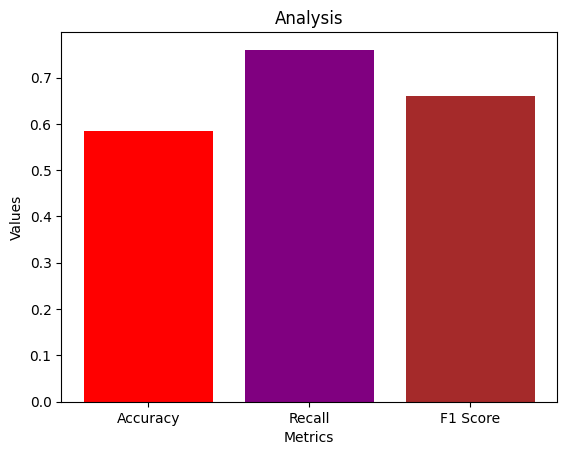

In [ ]:
metrics = ['Accuracy', 'Recall', 'F1 Score']
values = [ senti_cm.precision(), senti_cm.recall(), senti_cm.F1()]
plt.bar(metrics, values, color=['red', 'purple', 'brown'])
plt.xlabel('Metrics')
plt.title('Analysis')
plt.ylabel('Values')
plt.show()

**BRIEFING**

To calculate accuracy, precision, recall, and F1 score, we would need a labeled dataset for testing.

To Evaluate the performance of the classifier we need:
Accuracy: (Number of correct predictions) / (Total number of predictions)

Precision: (Number of true positives) / (Number of true positives + Number of false positives)

Recall (Sensitivity): (Number of true positives) / (Number of true positives + Number of false negatives)

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

Conclusion: We can not attain the exact solution if we exclusively consider accuracy in this case.



---



---



Constructing a Naive Bayes classifier (e.g., from NLTK).

Comparing the performance of your word list classifier with the Naive Bayes classifier.  

In [ ]:
from nltk.classify.api import ClassifierI

class NBClassifier(ClassifierI):

    def __init__(self):

        pass

    def _set_known_vocabulary(self,training_data):
        #add your code here
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)


    def _set_priors(self,training_data):

        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors



    def _set_cond_probs(self,training_data):

        prob_dict={}
        for(doc,label) in training_data:
            classcond=prob_dict.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1

            prob_dict[label]=classcond

        for label, classcond in prob_dict.items():
            for word in self.known:

                classcond[word]=classcond.get(word,0)+1
            prob_dict[label]=classcond

        for label,dist in prob_dict.items():
            total=sum(dist.values())
            prob_dict[label]={key:value/total for (key,value) in dist.items()}

        self.prob_dict=prob_dict


    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)

    def classify(self,doc):

        import random
        import math
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.prob_dict[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)

In [ ]:
NB_class=NBClassifier()
NB_class.train(norm_train_data)

In [ ]:
docs_nb,labels_nb=zip(*norm_test_data)

In [ ]:
cm_nb=ConfusionMatrix(NB_class.classify_many(docs),labels_nb,classes=("pos","neg"))
precision_nb = cm_nb.precision()
score_nb = class_evaluate(reviews_classifier,norm_test_data)
recall_nb = cm_nb.recall()
f1_score_nb = cm_nb.F1()

In [ ]:
NB_results = [score_nb,precision_nb,recall_nb, f1_score_nb]
WLC_results = [mark,recall, F1_score]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df=pd.DataFrame(NB_results,columns=['NB Results'], index = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(df)

,NB Results
Accuracy,0.610000
Precision,0.848057
Recall,0.800000
F1 Score,0.823328


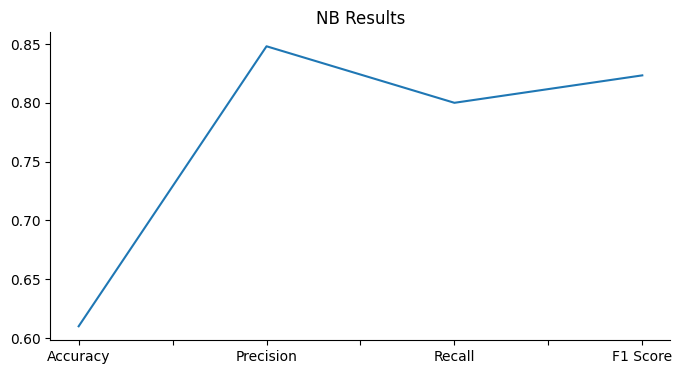

In [ ]:
from matplotlib import pyplot as plt
df['NB Results'].plot(kind='line', figsize=(8, 4), title='NB Results')
plt.gca().spines[['top', 'right']].set_visible(False)

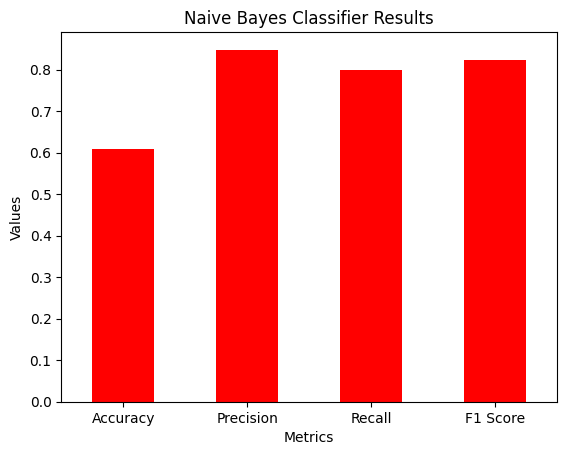

In [ ]:
df.plot(kind='bar', legend=False, rot=0, color='red')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Naive Bayes Classifier Results')
plt.show()

In [ ]:
df_2=pd.DataFrame(WLC_results,columns=['Word List Classifier Results'], index = ['Accuracy', 'Recall', 'F1 Score'])
display(df_2)

,Word List Classifier Results
Accuracy,0.637857
Recall,0.760000
F1 Score,0.660870


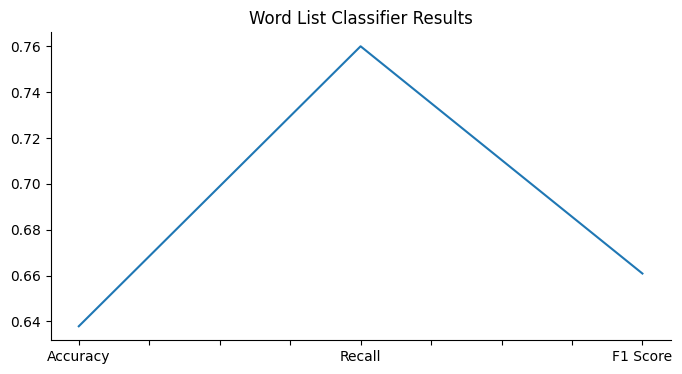

In [ ]:
from matplotlib import pyplot as plt
_df_1['Word List Classifier Results'].plot(kind='line', figsize=(8, 4), title='Word List Classifier Results')
plt.gca().spines[['top', 'right']].set_visible(False)

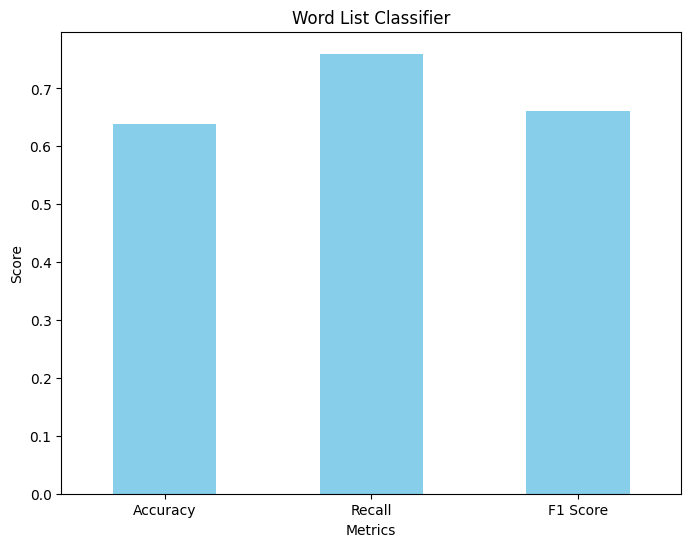

In [ ]:
df_2 = pd.DataFrame(WLC_results, columns=['Word List Classifier Results'], index=['Accuracy', 'Recall', 'F1 Score'])
df_2.plot(kind='bar', legend=False, rot=0, color='skyblue', figsize=(8, 6))
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Word List Classifier')
plt.show()


**BRIEFING**

Based on the results, its evident that the Word List Classifier suprasses Naive Bayes in terms of accuracy as well as recall.

Bayes demonstrates superior accuracy in predicting the target variable. It outperforms the Word List Classifier in precision and F1 score.
It Appears to be more preferable option.

But it also suggests that the World List Classifier excels in overall correctness and proficiently categorizing words of the target class.



---



---

